In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('talk')

### Generating data

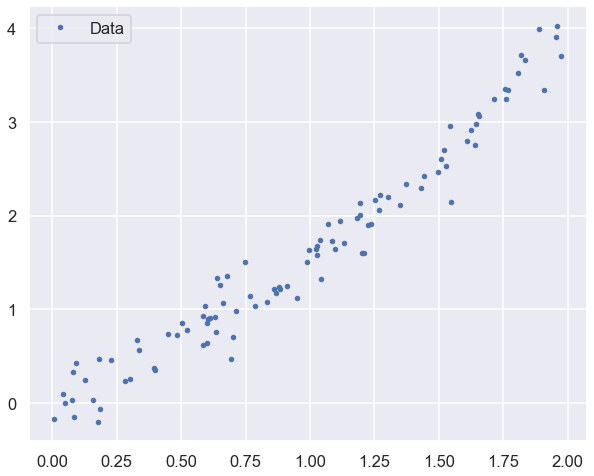

In [25]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(10)
m = 100 # Number of data

# X are picked uniform random [0,2]
X = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X  + 0.2 * np.random.randn(m, 1)

#Plotting the two 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X,y,'b.',label='Data')
ax.legend(loc='best')

### Making predictions

Method used first is ordinary least squares

The is equivalent to finding the ordinary least squares estimator $\hat{\boldsymbol \theta}$ for the physical parameter, and is given by
$\hat{\boldsymbol \theta} = (\boldsymbol X^{T} \boldsymbol X)^{-1}\boldsymbol  X^T \boldsymbol{\mathcal{D}}$.


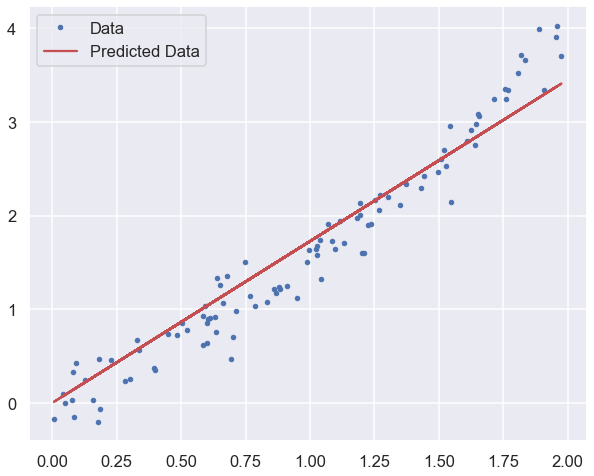

In [26]:
# Using the above mentioned formula
theta_est = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Making a prediction : 
y_est = theta_est*X

#Plotting the Predicted with the Actual data
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X,y,'b.',label='Data')
ax.plot(X,y_est,'r-',label='Predicted Data')
ax.legend(loc='best')

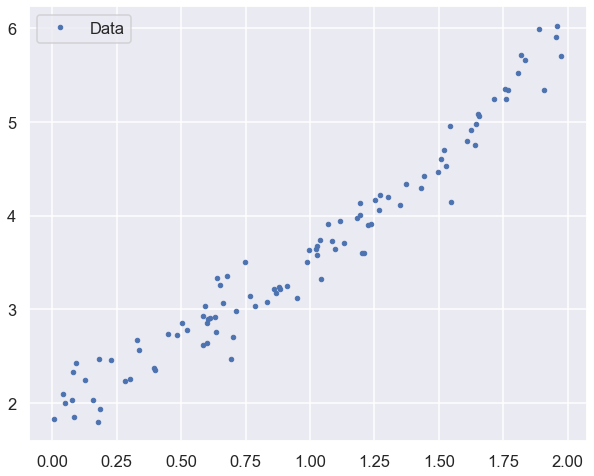

In [39]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(10)
m = 100 # Number of data

# X are picked uniform random [0,2]
X_2 = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y_2 = 0.5 * X_2**2 + X_2 + 2 + 0.2 * np.random.randn(m, 1)

#Plotting the two 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_2,y_2,'b.',label='Data')
ax.legend(loc='best')

### Using bias term

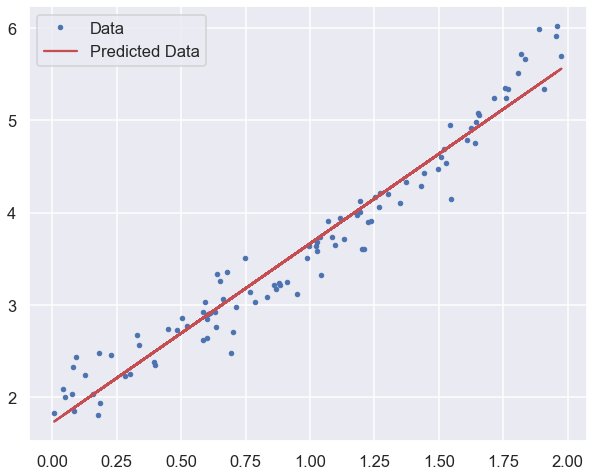

In [44]:
x_design = np.vander(X_2.flatten(), N = 2, increasing=True)
theta_lr = np.linalg.inv(x_design.T.dot(x_design)).dot(x_design.T).dot(y_2)
y_est2 =  x_design@theta_lr

#Plotting the Predicted with the Actual data
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_2,y_2,'b.',label='Data')
ax.plot(X_2,y_est2,'r-',label='Predicted Data')
ax.legend(loc='best')

### Polynomial Regression


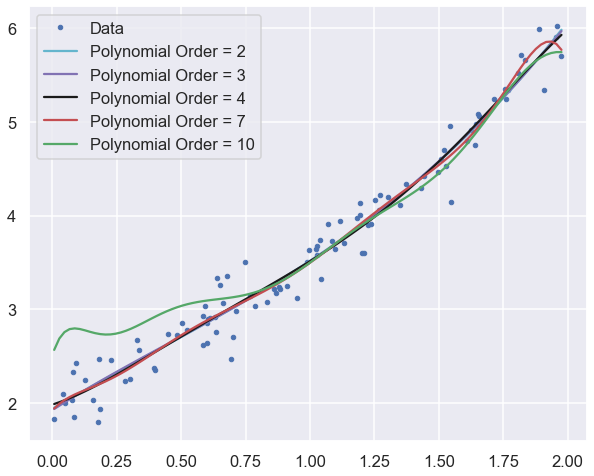

In [87]:
amin = np.min(X_2)
amax = np.max(X_2)

color = ['c','m','k','r','g']
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_2,y_2,'b.',label='Data')

order = [2,3,4,7,10]

for i in range(5):
    x_design = np.vander(X_2.flatten(), N = 2+order[i], increasing=True)
    theta_lr = np.linalg.inv(x_design.T.dot(x_design)).dot(x_design.T).dot(y_2)
    x_pred = np.linspace(amin,amax,100)
    x_pred_d = np.vander(x_pred.flatten(), N = 2+order[i], increasing=True)
    y_est2 =  x_pred_d@theta_lr

    #Plotting the Predicted with the Actual data
    ax.plot(x_pred,y_est2,color[i],label=f'Polynomial Order = {order[i]}')
    
ax.legend(loc='best')